<a href="https://colab.research.google.com/github/bravo-ti/Challenge-1---Alura-Store/blob/main/AluraStoreBr_By_Wilson_Soares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [2]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


Faturamento por Loja:
Loja 1: R$ 1,534,509.12
Loja 2: R$ 1,488,459.06
Loja 3: R$ 1,464,025.03
Loja 4: R$ 1,384,497.58


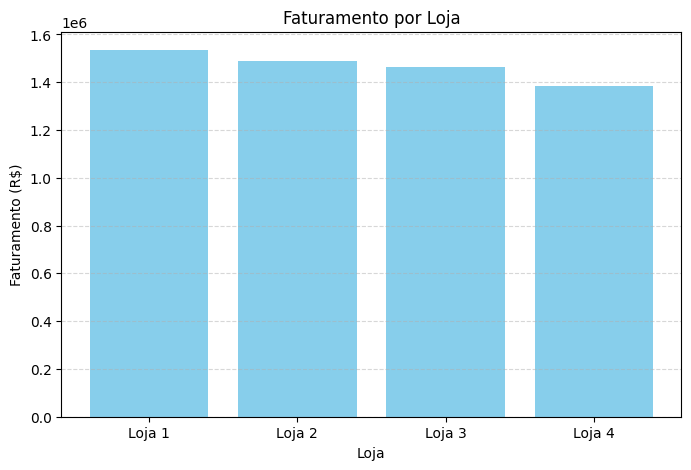

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Criando uma lista com todas as lojas
lojas = [loja1, loja2, loja3, loja4]

# Adicionando um identificador de loja de forma dinâmica
for i, loja in enumerate(lojas, start=1):
    loja["Loja"] = f"Loja {i}"

# Concatenando os DataFrames das lojas
df = pd.concat(lojas)

# Calculando faturamento por loja de forma eficiente
faturamento_por_loja = df.groupby("Loja")["Preço"].sum()

# Exibindo os faturamentos formatados
print("Faturamento por Loja:")
for loja, faturamento in faturamento_por_loja.items():
    print(f"{loja}: R$ {faturamento:,.2f}")

# Criando um gráfico de barras para visualização
plt.figure(figsize=(8, 5))
plt.bar(faturamento_por_loja.index, faturamento_por_loja.values, color="skyblue")

# Adicionando títulos e rótulos
plt.title("Faturamento por Loja")
plt.xlabel("Loja")
plt.ylabel("Faturamento (R$)")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Exibindo o gráfico
plt.show()

# 2. Vendas por Categoria


In [44]:

for i, loja in enumerate(lojas, start=1):
    vendas_por_categoria = loja.groupby("Categoria do Produto")["Categoria do Produto"].value_counts()
    vendas_por_categoria.name = ""  # Remove o nome da série
    print(f"Vendas por Categoria (Loja {i}): \n{vendas_por_categoria.to_string()}\n")

Vendas por Categoria (Loja 1): 
Categoria do Produto
brinquedos               324
eletrodomesticos         312
eletronicos              448
esporte e lazer          284
instrumentos musicais    182
livros                   173
moveis                   465
utilidades domesticas    171

Vendas por Categoria (Loja 2): 
Categoria do Produto
brinquedos               313
eletrodomesticos         305
eletronicos              422
esporte e lazer          275
instrumentos musicais    224
livros                   197
moveis                   442
utilidades domesticas    181

Vendas por Categoria (Loja 3): 
Categoria do Produto
brinquedos               315
eletrodomesticos         278
eletronicos              451
esporte e lazer          277
instrumentos musicais    177
livros                   185
moveis                   499
utilidades domesticas    177

Vendas por Categoria (Loja 4): 
Categoria do Produto
brinquedos               338
eletrodomesticos         254
eletronicos              451
es

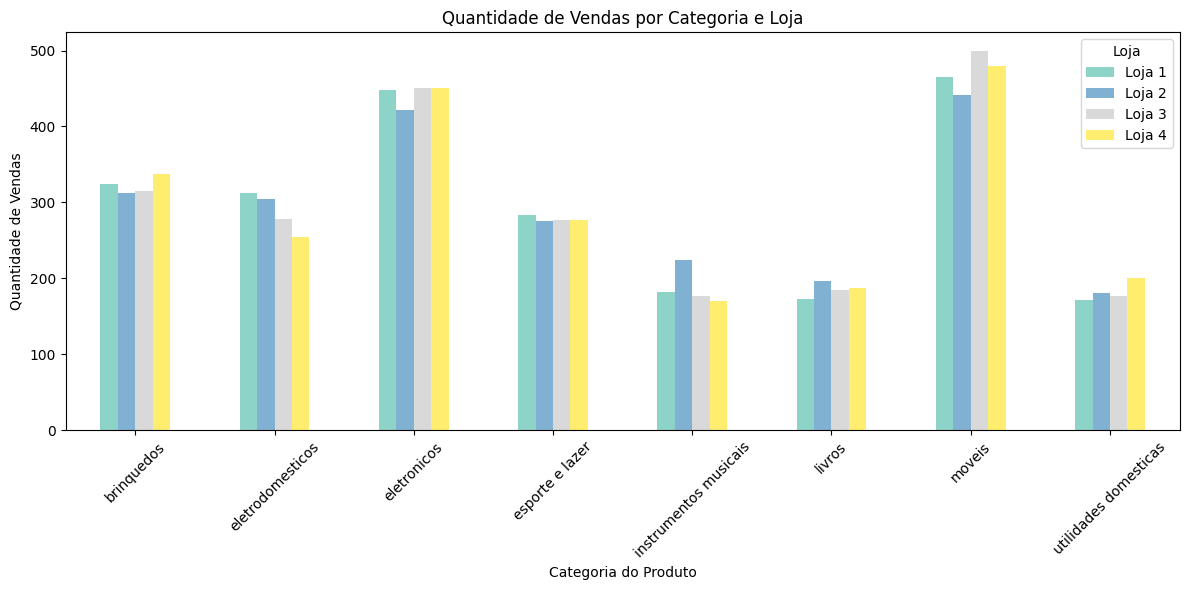

In [46]:
# Criando uma lista com todas as lojas
lojas = [loja1, loja2, loja3, loja4]

# Criando um dicionário dinâmico para o DataFrame
vendas_por_loja = {f"Loja {i+1}": loja.groupby("Categoria do Produto")["Categoria do Produto"].value_counts() for i, loja in enumerate(lojas)}

# Criando o DataFrame a partir do dicionário
todas_categorias = pd.DataFrame(vendas_por_loja)

# Gerando o gráfico
todas_categorias.plot(kind="bar", figsize=(12, 6), colormap="Set3")
plt.title("Quantidade de Vendas por Categoria e Loja")
plt.xlabel("Categoria do Produto")
plt.ylabel("Quantidade de Vendas")
plt.xticks(rotation=45)
plt.legend(title="Loja")
plt.tight_layout()
plt.show()  # Garantindo que o gráfico será exibido



# 3. Média de Avaliação das Lojas

In [11]:
# Criando uma lista com todas as lojas
lojas = [loja1, loja2, loja3, loja4]

# Calculando a média de avaliação para cada loja de forma dinâmica
avaliacoes_por_loja = {f"Loja {i+1}": loja["Avaliação da compra"].mean() for i, loja in enumerate(lojas)}

# Exibindo os resultados formatados
print("Avaliação por Loja:")
for loja, avaliacao in avaliacoes_por_loja.items():
    print(f"{loja}: {avaliacao:,.2f}")

Avaliação por Loja:
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


#Criando o gráfico

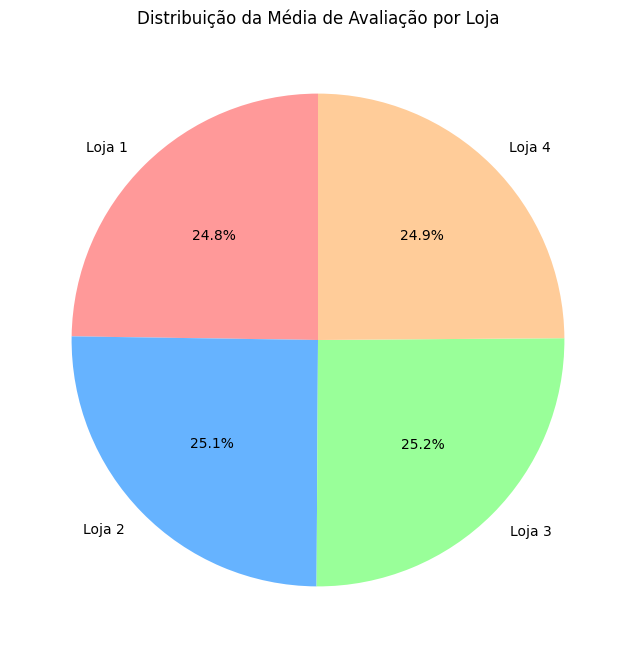

In [13]:
import matplotlib.pyplot as plt

# Criando uma lista com todas as lojas
lojas = [loja1, loja2, loja3, loja4]

# Calculando a média de avaliação para cada loja de forma dinâmica
avaliacoes_por_loja = {f"Loja {i+1}": loja["Avaliação da compra"].mean() for i, loja in enumerate(lojas)}

import matplotlib.pyplot as plt

# Criando uma lista com todas as lojas
lojas = [loja1, loja2, loja3, loja4]

# Calculando a média de avaliação para cada loja de forma dinâmica
avaliacoes_por_loja = {f"Loja {i+1}": loja["Avaliação da compra"].mean() for i, loja in enumerate(lojas)}

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(avaliacoes_por_loja.values(), labels=avaliacoes_por_loja.keys(), autopct="%1.1f%%",
        startangle=90, colors=["#ff9999","#66b3ff","#99ff99","#ffcc99"])

# Adicionando título
plt.title("Distribuição da Média de Avaliação por Loja")

# Exibindo o gráfico
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [16]:
import pandas as pd

# Criando uma lista com todas as lojas
lojas = [loja1, loja2, loja3, loja4]

# Concatenando os DataFrames das lojas
df = pd.concat(lojas)
# Contar a quantidade de vendas por produto
vendas_por_produto = df['Produto'].value_counts().reset_index()
vendas_por_produto.columns = ['Produto', 'Quantidade_Vendida']

# Ordenar por quantidade vendida
vendas_por_produto = vendas_por_produto.sort_values('Quantidade_Vendida', ascending=False)

# Mostrar os 10 produtos mais vendidos
print("Top 10 produtos mais vendidos:")
print(vendas_por_produto.head(10))

# Mostrar os 10 produtos menos vendidos
print("\nTop 10 produtos menos vendidos:")
print(vendas_por_produto.tail(10))

Top 10 produtos mais vendidos:
                    Produto  Quantidade_Vendida
0                    Cômoda                 210
1  Carrinho controle remoto                 206
2               Micro-ondas                 206
3                   Bateria                 203
4                 Cama king                 201
5        Secadora de roupas                 200
6       Modelagem preditiva                 200
7           Jogo de panelas                 200
8                  Cama box                 199
9          Blocos de montar                 199

Top 10 produtos menos vendidos:
                        Produto  Quantidade_Vendida
41            Panela de pressão                 172
42                   Smartwatch                 172
43                Jogo de copos                 169
44                     Poltrona                 168
45           Assistente virtual                 167
46  Ciência de dados com python                 166
47                     Guitarra             

# 5. Frete Médio por Loja


In [19]:
# Calcular o frete médio por loja
frete_medio_por_loja = df.groupby("Loja")["Frete"].mean().reset_index()
frete_medio_por_loja.columns = ["Loja", "Frete Médio"]
frete_medio_por_loja

,Loja,Frete Médio
0,Loja 1,34.691805
1,Loja 2,33.621941
2,Loja 3,33.074464
3,Loja 4,31.278997
